<h2>Question 1<\h2>
<h4>The reason<\h4>

In [1]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import cv2
from helper import *
from itertools import product

In [3]:
left = cv2.imread("A4_files/000020_left.jpg")
right = cv2.imread("A4_files/000020_right.jpg")
with open("A4_files/000020.txt") as file:
    x_min, y_min, x_max, y_max = [float(i) for i in file.read().split()[1:]]
with open("A4_files/000020_allcalib.txt") as file:
    f, px, py, baseline = file.read().split()[1::2]
print(x_min, y_min, x_max, y_max, f, px, py, baseline)

685.05 181.43 804.68 258.21 721.537700 609.559300 172.854000 0.5327119288


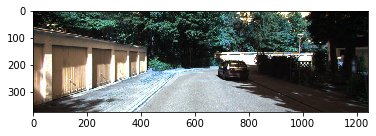

In [4]:
patchsize = 5
imshow(left)

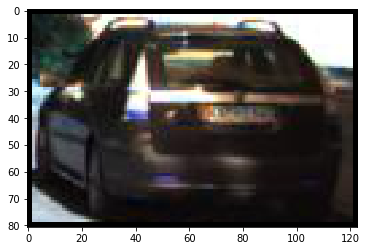

In [5]:
tar = left[int(y_min):int(y_max), int(x_min):int(x_max)]
tar = np.pad(tar, [[patchsize//2, patchsize//2], [patchsize//2, patchsize//2], [0, 0]])
imshow(tar)

### Q2
a. I am using SSD for this part

In [ ]:
def SSD(patch1, patch2):
    return np.sum((patch1 - patch2)**2)
    
def rowler(patch, imgr, row_idx):
    patchsize = patch.shape[0]
    row = imgr[:, row_idx:patchsize]
    ssd_list = []
    for i in range(row.shape[1]-patchsize+1):
        ssd_list.append(SSD(patch, img[row_idx:row_idx+patchsize, i:i+patchsize]))
    return np.array(ssd_list)

def disparity(patch, imgr, y_min, x_min):
    row_idx = y_min
    ssd_list = rowler(patch, imgr, row_idx)
    ssd_list.argmax